In [12]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
network_csv = pd.read_csv('/Users/mandarmp/Documents/CDKL5Paper/Fig4/CDKL5_hyperbursts_sep/Network_outputs/Compiled_Networks.csv')

In [3]:
network_csv.columns

Index(['Run_ID', 'DIV', 'Assay', 'Well', 'NeuronType', 'Time', 'Chip_ID',
       'mean_IBI', 'cov_IBI', 'mean_Burst_Peak', 'cov_Burst_Peak',
       'Number_Bursts', 'burstRate', 'mean_Spike_per_Burst',
       'cov_Spike_per_Burst', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
       'mean_BurstDuration', 'cov_BurstDuration', 'BaselineFiringRate',
       'IBI_List', 'Burst_Peak_List', 'Abs_Burst_Peak_List',
       'Burst_Times_List', 'SpikesPerBurst_List'],
      dtype='object')

In [14]:
network_csv = network_csv[network_csv['DIV'].isin([8,13,16,20,23,27])]

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


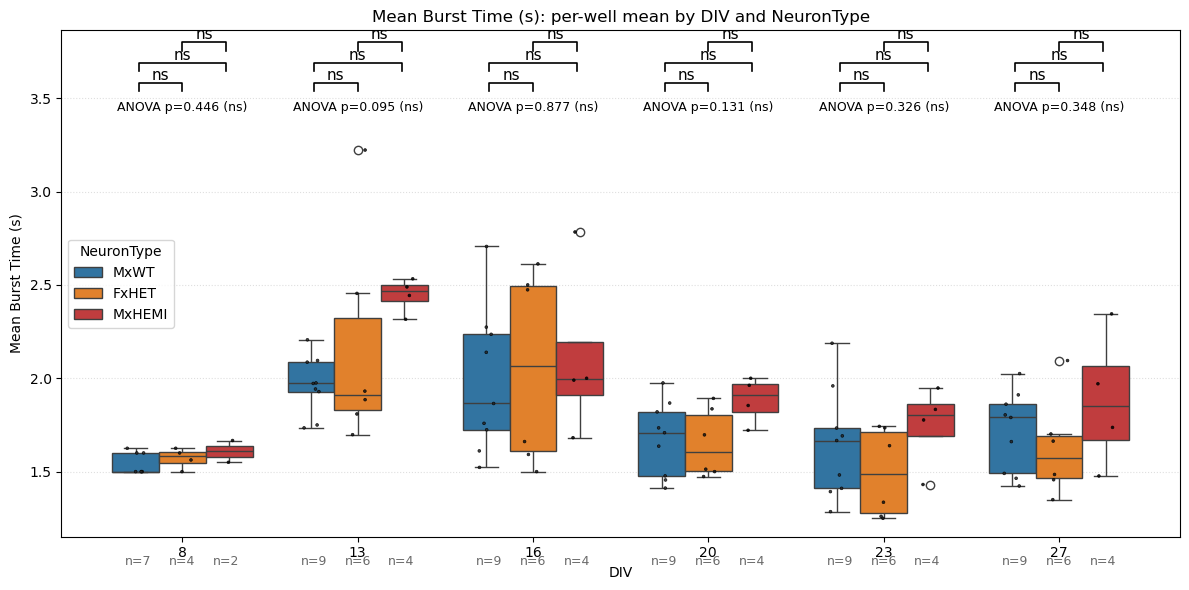

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


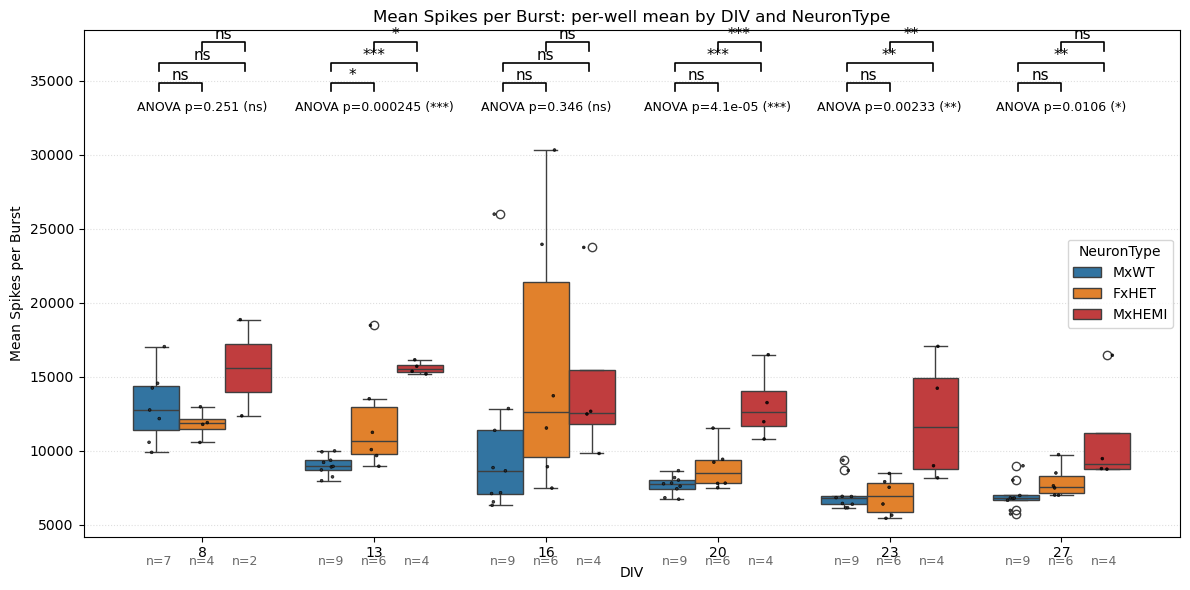

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


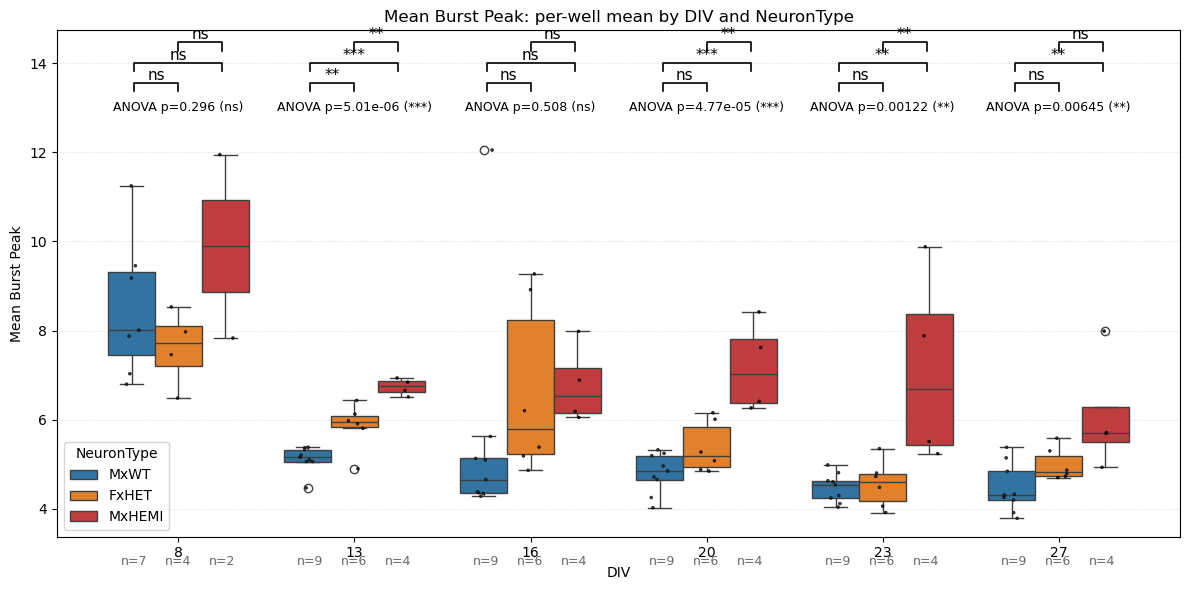

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2531107242.py:67: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


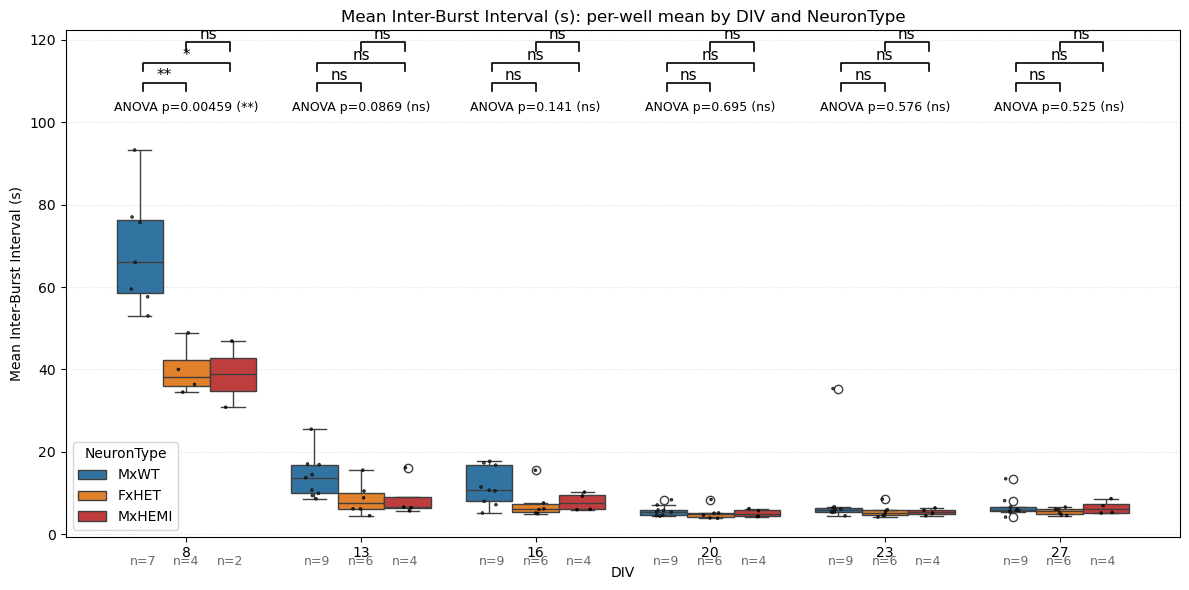

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from itertools import combinations

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def plot_feature_from_list_anova_tukey(
    df,
    list_col,
    feature_label=None,
    plot_type="box",
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#ff7f0e','MxHEMI':'#d62728'},
    save_path=None
):
    # 1) Ensure numeric list column exists alongside original
    num_col = f"{list_col}_Numeric"
    if num_col not in df.columns:
        df[num_col] = df[list_col].apply(lambda x: [float(i) for i in str(x).split(',')] if pd.notnull(x) else [])

    # 2) Build long form
    long_df = df[['DIV', 'Well', 'Chip_ID', 'NeuronType', num_col]].copy()
    long_df = long_df.rename(columns={num_col: 'Value_List'})
    long_df['ChipID_Well'] = long_df['Chip_ID'].astype(str) + '_W' + long_df['Well'].astype(str)
    long_df = long_df.explode('Value_List').reset_index(drop=True)
    long_df['Value'] = pd.to_numeric(long_df['Value_List'], errors='coerce')
    long_df.dropna(subset=['Value'], inplace=True)

    # 3) Aggregate mean per ChipID_Well × NeuronType × DIV (independent unit)
    agg_df = long_df.groupby(['DIV','ChipID_Well','NeuronType']).agg(
        mean_value=('Value','mean')
    ).reset_index()

    # 4) Plot
    feature_label = feature_label or list_col.replace('_', ' ')
    divs = sorted(agg_df['DIV'].unique())
    fig, ax = plt.subplots(figsize=(12,6))

    if plot_type == "box":
        sns.boxplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette,
            # showcaps=True, showbox=True, notch=True, width=0.6, linewidth=2,
            # whiskerprops=dict(linewidth=2, color='gray'),
            # capprops=dict(linewidth=2, color='gray'),
            # medianprops=dict(linewidth=2.5, color='black'),
            # flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.2),
            ax=ax
        )
    else:
        sns.barplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette, edgecolor='black',
            errorbar=None, capsize=0.15, width=0.7, dodge=True, ax=ax
        )

    # Stripplot overlay
    sns.stripplot(
        data=agg_df, x="DIV", y="mean_value",
        hue="NeuronType", hue_order=order,
        dodge=True, color='black', size=2, alpha=0.85,
        jitter=0.15, edgecolor='gray', linewidth=0.5, ax=ax
    )
    # Keep one legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:len(order)], labels[:len(order)], title="NeuronType")

    # # Mean ± SEM overlay (per DIV × NeuronType)
    # group_stats = agg_df.groupby(['DIV','NeuronType'])['mean_value'].agg(['mean', sem])
    # ntypes = len(order)
    # spacing = 0.7 / ntypes
    # for i, div in enumerate(divs):
    #     for j, nt in enumerate(order):
    #         if (div, nt) in group_stats.index:
    #             m = group_stats.loc[(div, nt), 'mean']
    #             e = group_stats.loc[(div, nt), 'sem']
    #             x_pos = i + j*spacing - (0.35 - spacing/2)
    #             ax.errorbar(x_pos, m, yerr=e, fmt='o', markersize=7,
    #                         capsize=4, elinewidth=2,
    #                         markerfacecolor='black', markeredgecolor='black',
    #                         color='black', zorder=15)

    # Headroom
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange*0.25)

    # Stats per DIV: one-way ANOVA + Tukey HSD
    for i, div in enumerate(divs):
        sub = agg_df[agg_df['DIV'] == div].copy()

        # Ensure groups exist and have at least n>=2 for stability
        counts = sub.groupby('NeuronType')['mean_value'].size()
        valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
        if len(valid_groups) < 2:
            # Still print n below
            pass
        sub = sub[sub['NeuronType'].isin(valid_groups)]

        # Omnibus ANOVA (classical). Consider Welch if variances unequal.
        p_anova = np.nan
        if sub['NeuronType'].nunique() >= 2:
            try:
                model = ols("mean_value ~ C(NeuronType)", data=sub).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                if 'C(NeuronType)' in anova_table.index:
                    p_anova = float(anova_table.loc['C(NeuronType)', 'PR(>F)'])
            except Exception:
                # Fallback: simple between-groups ANOVA via scipy if desired
                pass

        if not np.isnan(p_anova):
            sig = "***" if p_anova < 0.001 else "**" if p_anova < 0.01 else "*" if p_anova < 0.05 else "ns"
            ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                    ha='center', fontsize=9)

        # Tukey HSD pairwise comparisons (equal-variance assumption)
        try:
            if sub['NeuronType'].nunique() >= 2:
                tuk = pairwise_tukeyhsd(endog=sub['mean_value'].values,
                                        groups=sub['NeuronType'].values,
                                        alpha=0.05)
                # Parse results table
                results_df = pd.DataFrame(
                    data=tuk._results_table.data[1:],
                    columns=tuk._results_table.data[0]
                )
                # Draw pairwise significance bars following the plotting order
                pairs = list(combinations(order, 2))
                h = yrange * 0.02
                base = yrange * 0.10
                step = 0.05
                for k, (s1, s2) in enumerate(pairs):
                    row = results_df[
                        ((results_df['group1'] == s1) & (results_df['group2'] == s2)) |
                        ((results_df['group1'] == s2) & (results_df['group2'] == s1))
                    ]
                    if row.empty:
                        continue
                    p_adj = float(row['p-adj'].iloc[0])
                    sig = "***" if p_adj < 0.001 else "**" if p_adj < 0.01 else "*" if p_adj < 0.05 else "ns"

                    # horizontal positions aligned to your dodged groups
                    step_x = 0.25
                    x1 = i + (order.index(s1) - 1) * step_x
                    x2 = i + (order.index(s2) - 1) * step_x
                    y = ymax + base + k * (yrange * step)

                    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                    ax.text((x1 + x2) / 2, y + h, sig, ha='center', va='bottom', fontsize=11)
        except Exception:
            # If Tukey fails (e.g., too few observations), silently skip pairwise bars
            pass

        # Sample sizes (n cultures per group at this DIV)
        counts = sub.groupby('NeuronType')['ChipID_Well'].nunique() if 'ChipID_Well' in sub.columns else sub.groupby('NeuronType')['Well'].nunique()
        for j, nt in enumerate(order):
            n = counts.get(nt, 0)
            x_pos = i + (j - 1) * 0.25
            ax.text(x_pos, ymin - yrange*0.07,
                    f'n={n}', ha='center', fontsize=9, color='dimgrey')

    # Cosmetics
    ax.yaxis.grid(True, linestyle=':', alpha=0.4)
    ax.set_axisbelow(True)
    ylab = feature_label if "time" in (feature_label or "").lower() else feature_label
    ax.set_ylabel(ylab)
    ax.set_xlabel("DIV")
    ax.set_title(f"{feature_label}: per-well mean by DIV and NeuronType")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='svg', dpi=300)
    plt.show()

# Example calls (adjust save paths)
plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='Burst_Times_List',
    feature_label='Mean Burst Time (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperbursttimes_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='SpikesPerBurst_List',
    feature_label='Mean Spikes per Burst',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperspikesperburst_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='Burst_Peak_List',
    feature_label='Mean Burst Peak',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperburstpeak_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='IBI_List',
    feature_label='Mean Inter-Burst Interval (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperibi_anova_tukey.svg"
)

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/3914849009.py:124: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
/Users/mandarmp/anaconda3/envs/map/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


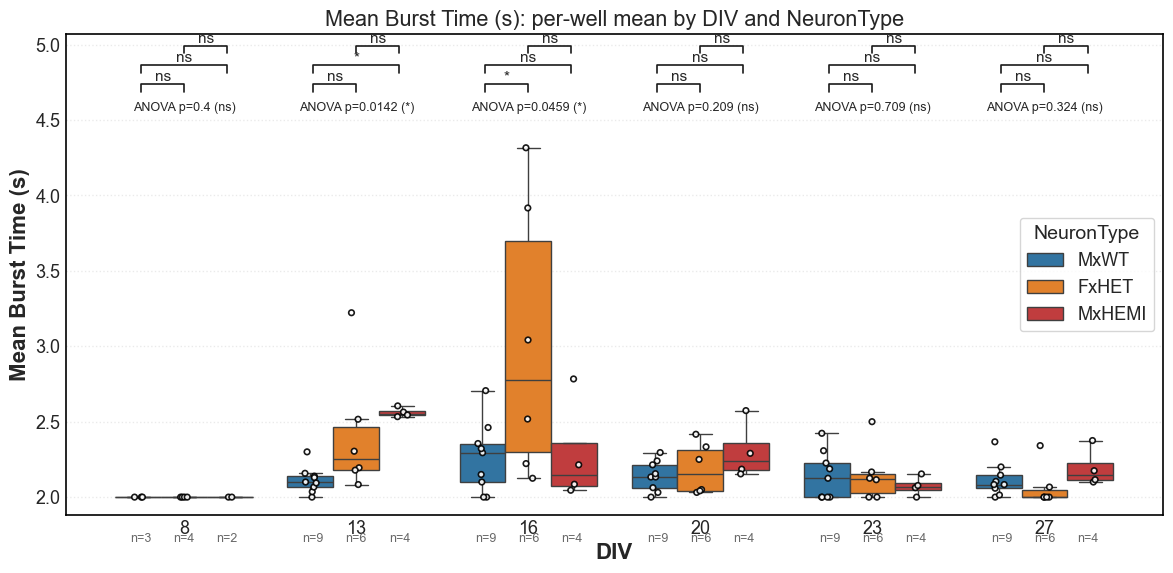

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/3914849009.py:124: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


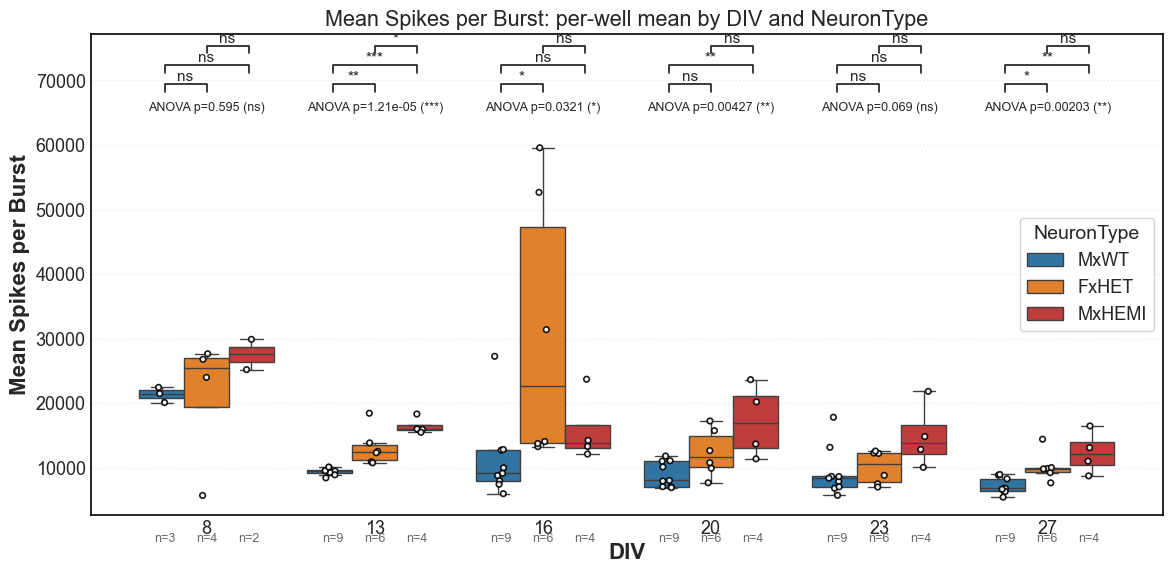

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/3914849009.py:124: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


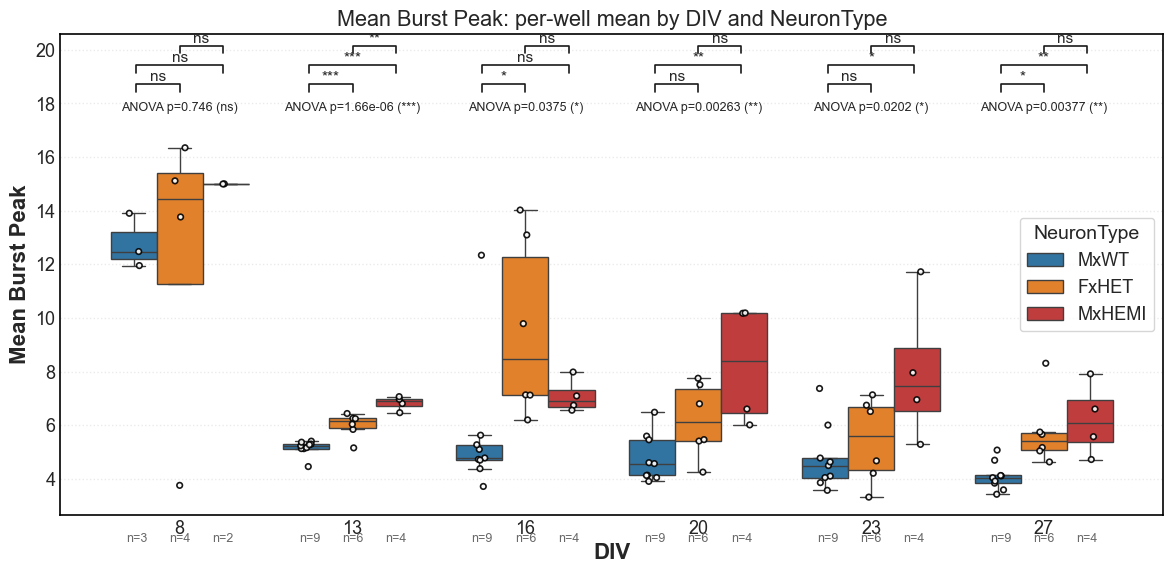

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/3914849009.py:124: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


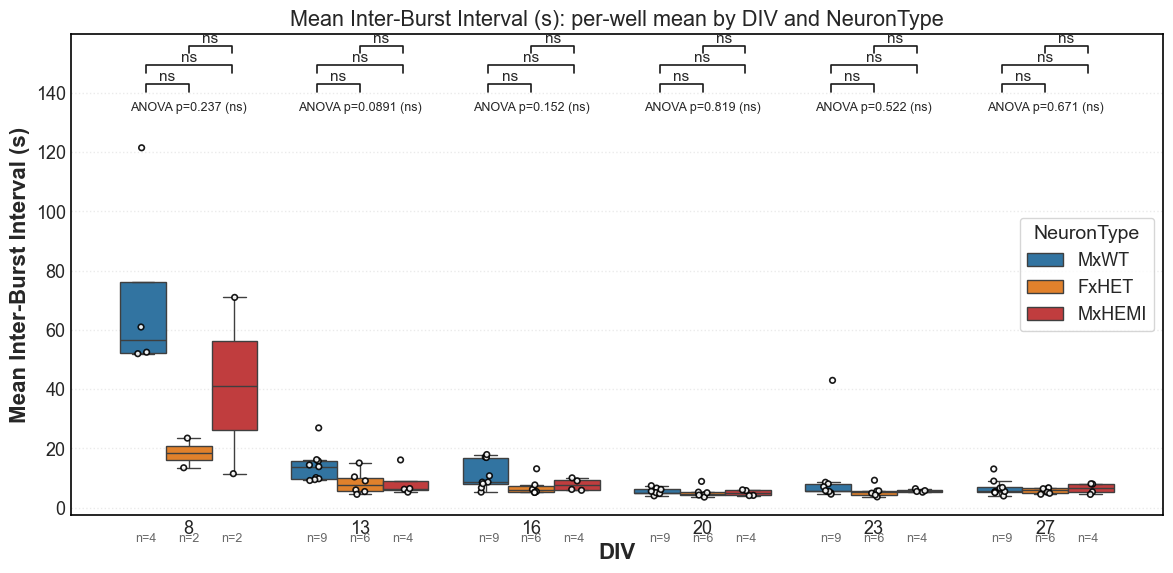

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from itertools import combinations

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


sns.set_theme(style='white', font_scale=1.3, rc={
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelweight": "bold",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.title_fontsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in"
})



def plot_feature_from_list_anova_tukey(
    df,
    list_col,
    feature_label=None,
    plot_type="box",
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#ff7f0e','MxHEMI':'#d62728'},
    save_path=None,
    filter_burst_times=True,   # now applied after explode
    burst_time_threshold=1.5,
    burst_peak_threshold=3,
    plot_burst_rate = False
):
    # --- 1) Ensure numeric list column exists ---
    num_col = f"{list_col}_Numeric"
    if num_col not in df.columns:
        def safe_parse(x):
            if isinstance(x, list):
                return [float(i) for i in x]
            if pd.isna(x):
                return []
            return [float(i) for i in str(x).split(',')]
        df[num_col] = df[list_col].apply(safe_parse)

    # --- 2) Build long form (explode into one burst per row) ---
    long_df = df[['DIV', 'Well', 'Chip_ID', 'NeuronType', num_col]].copy()
    long_df = long_df.rename(columns={num_col: 'Value_List'})
    long_df['ChipID_Well'] = long_df['Chip_ID'].astype(str) + '_W' + long_df['Well'].astype(str)
    long_df = long_df.explode('Value_List').reset_index(drop=True)
    long_df['Value'] = pd.to_numeric(long_df['Value_List'], errors='coerce')

    # --- 3) If filtering, require Burst_Times and Burst_Peaks per burst ---
    if filter_burst_times and 'Burst_Times_List' in df.columns and 'Burst_Peak_List' in df.columns:
        # Parse times and peaks into long form too
        def safe_parse(x):
            if isinstance(x, list):
                return [float(i) for i in x]
            if pd.isna(x):
                return []
            return [float(i) for i in str(x).split(',')]

        if 'Burst_Times_List_Numeric' not in df.columns:
            df['Burst_Times_List_Numeric'] = df['Burst_Times_List'].apply(safe_parse)
        if 'Burst_Peak_List_Numeric' not in df.columns:
            df['Burst_Peak_List_Numeric'] = df['Burst_Peak_List'].apply(safe_parse)

        # Build exploded times/peaks aligned with long_df
        times_long = df[['Burst_Times_List_Numeric']].explode('Burst_Times_List_Numeric').reset_index(drop=True)
        peaks_long = df[['Burst_Peak_List_Numeric']].explode('Burst_Peak_List_Numeric').reset_index(drop=True)
        long_df['Burst_Time'] = pd.to_numeric(times_long['Burst_Times_List_Numeric'], errors='coerce')
        long_df['Burst_Peak'] = pd.to_numeric(peaks_long['Burst_Peak_List_Numeric'], errors='coerce')

        # Filter out bursts below thresholds
        # long_df = long_df[
        #     (long_df['Burst_Time'] > burst_time_threshold) &
        #     (long_df['Burst_Peak'] > burst_peak_threshold)
        # ]

        long_df = long_df[long_df['Burst_Time'] > burst_time_threshold]

    # Drop invalid values
    long_df.dropna(subset=['Value'], inplace=True)

    # --- 4) Aggregate mean per ChipID_Well × NeuronType × DIV ---
    agg_df = long_df.groupby(['DIV','ChipID_Well','NeuronType']).agg(
        mean_value=('Value','mean')
    ).reset_index()

    # --- 5) Plot ---
    feature_label = feature_label or list_col.replace('_', ' ')
    divs = sorted(agg_df['DIV'].unique())
    fig, ax = plt.subplots(figsize=(12,6))

    if plot_type == "box":
        sns.boxplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette,showfliers=False,
            # showcaps=True, showbox=True, notch=True, width=0.6, linewidth=2,
            # whiskerprops=dict(linewidth=2, color='gray'),
            # capprops=dict(linewidth=2, color='gray'),
            # medianprops=dict(linewidth=2.5, color='black'),
            # flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.2),
            ax=ax
        )
    else:
        sns.barplot(
            data=agg_df,
            x="DIV", y="mean_value",
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette, edgecolor='black',
            errorbar=None, capsize=0.15, width=0.7, dodge=True, ax=ax
        )

    # Stripplot overlay
    sns.stripplot(
        data=agg_df, x="DIV", y="mean_value",
        hue="NeuronType", hue_order=order,
        dodge=True,  palette=['white'],size=4, alpha=0.9,
        jitter=0.1, edgecolor='black', linewidth=1.2, ax=ax
    )
    # Keep one clean legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:len(order)], labels[:len(order)], title="NeuronType")

    # Headroom
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange*0.25)

    # --- 6) Stats per DIV: one-way ANOVA + Tukey HSD ---
    for i, div in enumerate(divs):
        sub = agg_df[agg_df['DIV'] == div].copy()
        counts = sub.groupby('NeuronType')['mean_value'].size()
        valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
        sub = sub[sub['NeuronType'].isin(valid_groups)]

        p_anova = np.nan
        if sub['NeuronType'].nunique() >= 2:
            try:
                model = ols("mean_value ~ C(NeuronType)", data=sub).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                if 'C(NeuronType)' in anova_table.index:
                    p_anova = float(anova_table.loc['C(NeuronType)', 'PR(>F)'])
            except Exception:
                pass

        if not np.isnan(p_anova):
            sig = "***" if p_anova < 0.001 else "**" if p_anova < 0.01 else "*" if p_anova < 0.05 else "ns"
            ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                    ha='center', fontsize=9)

        # Tukey HSD pairwise comparisons
        try:
            if sub['NeuronType'].nunique() >= 2:
                tuk = pairwise_tukeyhsd(endog=sub['mean_value'].values,
                                        groups=sub['NeuronType'].values,
                                        alpha=0.05)
                results_df = pd.DataFrame(
                    data=tuk._results_table.data[1:],
                    columns=tuk._results_table.data[0]
                )
                pairs = list(combinations(order, 2))
                h = yrange * 0.02
                base = yrange * 0.10
                step = 0.05
                for k, (s1, s2) in enumerate(pairs):
                    row = results_df[
                        ((results_df['group1'] == s1) & (results_df['group2'] == s2)) |
                        ((results_df['group1'] == s2) & (results_df['group2'] == s1))
                    ]
                    if row.empty:
                        continue
                    p_adj = float(row['p-adj'].iloc[0])
                    sig = "***" if p_adj < 0.001 else "**" if p_adj < 0.01 else "*" if p_adj < 0.05 else "ns"

                    step_x = 0.25
                    x1 = i + (order.index(s1) - 1) * step_x
                    x2 = i + (order.index(s2) - 1) * step_x
                    y = ymax + base + k * (yrange * step)

                    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
                    ax.text((x1 + x2) / 2, y + h, sig, ha='center', va='bottom', fontsize=11)
        except Exception:
            pass

        # Sample sizes
        counts = sub.groupby('NeuronType')['ChipID_Well'].nunique()
        for j, nt in enumerate(order):
            n = counts.get(nt, 0)
            x_pos = i + (j - 1) * 0.25
            ax.text(x_pos, ymin - yrange*0.07,
                    f'n={n}', ha='center', fontsize=9, color='dimgrey')

    # --- 7) Cosmetics ---
    ax.yaxis.grid(True, linestyle=':', alpha=0.4)
    ax.set_axisbelow(True)
    ax.set_ylabel(feature_label)
    ax.set_xlabel("DIV")
    ax.set_title(f"{feature_label}: per-well mean by DIV and NeuronType")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='svg', dpi=300)
    plt.show()



# # Example calls (adjust save paths)
# plot_feature_from_list_anova_tukey(
#     network_csv.copy(),
#     list_col='Burst_Times_List',
#     feature_label='Mean Burst Time (s)',
#     save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperbursttimes_anova_tukey.svg",plot_burst_rate=True
# )

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='Burst_Times_List',
    feature_label='Mean Burst Time (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperbursttimes_anova_tukey.svg"
)


plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='SpikesPerBurst_List',
    feature_label='Mean Spikes per Burst',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperspikesperburst_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='Burst_Peak_List',
    feature_label='Mean Burst Peak',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperburstpeak_anova_tukey.svg"
)

plot_feature_from_list_anova_tukey(
    network_csv.copy(),
    list_col='IBI_List',
    feature_label='Mean Inter-Burst Interval (s)',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperibi_anova_tukey.svg"
)

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2202971177.py:105: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


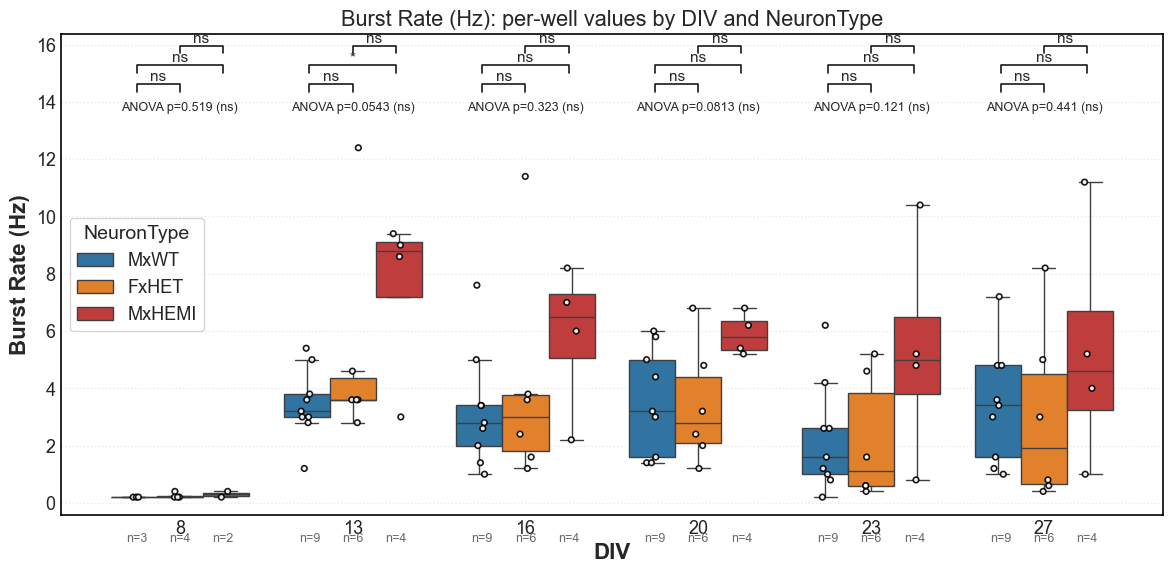

/var/folders/6w/yr2wjnwn37lg4ybj5mgstyv40000gn/T/ipykernel_56158/2202971177.py:105: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(


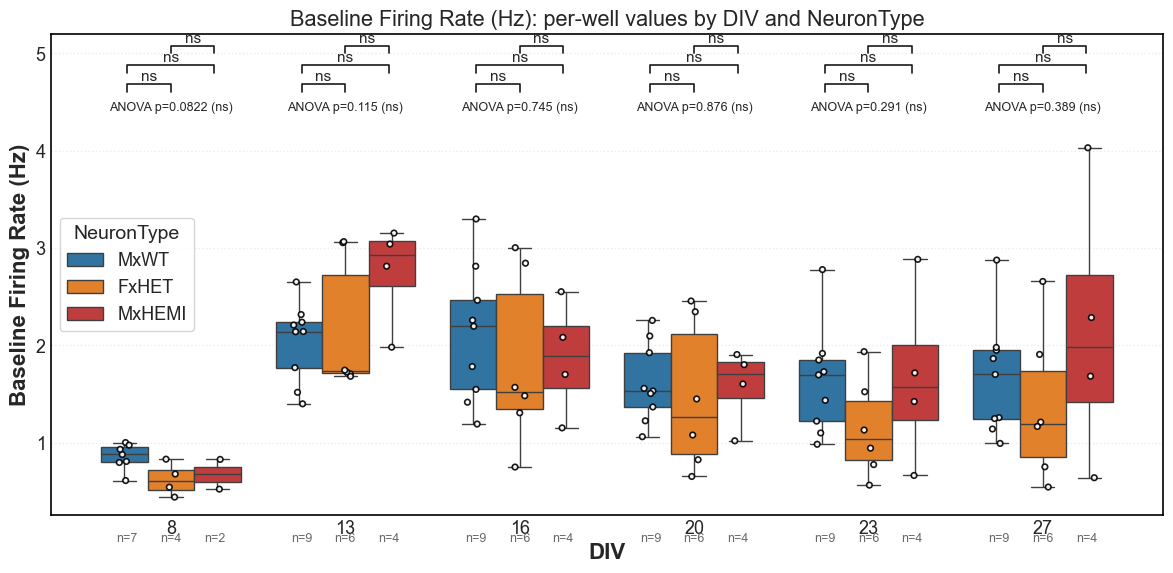

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import sem

def plot_scalar_feature(
    df,
    value_col,
    feature_label=None,
    plot_type="box",
    order=('MxWT','FxHET','MxHEMI'),
    palette={'MxWT':'#1f77b4','FxHET':'#ff7f0e','MxHEMI':'#d62728'},
    save_path=None,
    burst_time_threshold=1.5,
    burst_peak_threshold=3.0
):
    """
    Plot scalar features (per well values). Special handling if value_col == "burstRate":
    - Recompute burstRate from raw burst time/peak lists after thresholding.
    """

    # -------------------------------
    # 1. Handle burstRate specially
    # -------------------------------
    if value_col == "burstRate":
        def safe_parse(x):
            if isinstance(x, list):
                return [float(i) for i in x]
            if pd.isna(x):
                return []
            return [float(i) for i in str(x).split(',')]

        # Parse raw lists
        df['Burst_Times_List_Numeric'] = df['Burst_Times_List'].apply(safe_parse)
        if 'Burst_Peak_List' in df.columns:
            df['Burst_Peak_List_Numeric'] = df['Burst_Peak_List'].apply(safe_parse)
        else:
            df['Burst_Peak_List_Numeric'] = [[] for _ in range(len(df))]

        # Explode into long form
        bursts_long = df[['DIV','NeuronType','Chip_ID','Well',
                          'Burst_Times_List_Numeric','Burst_Peak_List_Numeric']].copy()
        bursts_long['ChipID_Well'] = bursts_long['Chip_ID'].astype(str) + '_W' + bursts_long['Well'].astype(str)
        bursts_long = bursts_long.explode(['Burst_Times_List_Numeric','Burst_Peak_List_Numeric']).reset_index(drop=True)

        bursts_long['Burst_Time'] = pd.to_numeric(bursts_long['Burst_Times_List_Numeric'], errors='coerce')
        bursts_long['Burst_Peak'] = pd.to_numeric(bursts_long['Burst_Peak_List_Numeric'], errors='coerce')

        # Apply thresholds
        bursts_long = bursts_long[
            bursts_long['Burst_Time'] > burst_time_threshold
        ]

        # Count bursts per well
        burst_counts = bursts_long.groupby(['DIV','ChipID_Well','NeuronType']).size().reset_index(name='BurstCount')
        # Convert to bursts/minute (assuming 5 min recordings)
        burst_counts[value_col] = burst_counts['BurstCount'] / 5.0  

        sub = burst_counts[['DIV','NeuronType','ChipID_Well', value_col]].copy()
        feature_label = feature_label or "Burst Rate (bursts/min)"

    else:
        # Generic scalar feature (already per well)
        sub = df[['DIV','NeuronType','Chip_ID','Well', value_col]].copy()
        sub['ChipID_Well'] = sub['Chip_ID'].astype(str) + '_W' + sub['Well'].astype(str)
        feature_label = feature_label or value_col.replace('_',' ')

    sub = sub.dropna(subset=[value_col])
    if sub.empty:
        print(f"No data for {value_col}; skipping.")
        return

    # -------------------------------
    # 2. Plotting setup
    # -------------------------------
    divs = sorted(sub['DIV'].unique())
    fig, ax = plt.subplots(figsize=(12,6))

    if plot_type == "box":
        sns.boxplot(
            data=sub, x="DIV", y=value_col,
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette,showfliers=False,
            # showcaps=True, showbox=True, notch=True, width=0.6, linewidth=2,
            # whiskerprops=dict(linewidth=2, color='gray'),
            # capprops=dict(linewidth=2, color='gray'),
            # medianprops=dict(linewidth=2.5, color='black'),
            # flierprops=dict(marker='o', markersize=3, markerfacecolor='gray', alpha=0.2),
            ax=ax
        )
    else:
        sns.barplot(
            data=sub, x="DIV", y=value_col,
            hue="NeuronType", order=divs,
            hue_order=order, palette=palette, edgecolor='black',
            errorbar=None, capsize=0.15, width=0.7, dodge=True, ax=ax
        )

    sns.stripplot(
        data=sub, x="DIV", y=value_col,
        hue="NeuronType", hue_order=order,
        dodge=True,  palette=['white'],size=4, alpha=0.9,
        jitter=0.1, edgecolor='black', linewidth=1.2, ax=ax
    )

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:len(order)], labels[:len(order)], title="NeuronType")

  

    # -------------------------------
    # 4. ANOVA + Tukey per DIV
    # -------------------------------
    ymin, ymax = ax.get_ylim(); yrange = ymax - ymin
    ax.set_ylim(ymin, ymax + yrange*0.25)

    for i, div in enumerate(divs):
        g = sub[sub['DIV'] == div].copy()
        g_agg = g.groupby(['NeuronType','ChipID_Well'])[value_col].mean().reset_index()

        counts = g_agg.groupby('NeuronType')[value_col].size()
        valid_groups = [nt for nt in order if counts.get(nt, 0) >= 2]
        if len(valid_groups) < 2:
            continue
        g_agg = g_agg[g_agg['NeuronType'].isin(valid_groups)]

        try:
            model = ols(f"{value_col} ~ C(NeuronType)", data=g_agg).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            p_anova = anova_table.loc['C(NeuronType)', 'PR(>F)']
            sig = "***" if p_anova < 1e-3 else "**" if p_anova < 1e-2 else "*" if p_anova < 0.05 else "ns"
            ax.text(i, ymax + yrange*0.05, f'ANOVA p={p_anova:.3g} ({sig})',
                    ha='center', fontsize=9)
        except Exception:
            pass

        # Tukey HSD
        tuk = pairwise_tukeyhsd(endog=g_agg[value_col].values,
                                groups=g_agg['NeuronType'].values,
                                alpha=0.05)
        results_df = pd.DataFrame(data=tuk._results_table.data[1:], columns=tuk._results_table.data[0])

        pairs = list(combinations(order, 2))
        h = yrange*0.02; base = yrange*0.10; step = 0.05
        for k, (s1, s2) in enumerate(pairs):
            row = results_df[
                ((results_df['group1'] == s1) & (results_df['group2'] == s2)) |
                ((results_df['group1'] == s2) & (results_df['group2'] == s1))
            ]
            if row.empty: continue
            p_adj = float(row['p-adj'].iloc[0])
            sig = "***" if p_adj < 1e-3 else "**" if p_adj < 1e-2 else "*" if p_adj < 0.05 else "ns"

            step_x = 0.25
            x1 = i + (order.index(s1) - 1) * step_x
            x2 = i + (order.index(s2) - 1) * step_x
            y = ymax + base + k * (yrange * step)

            ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
            ax.text((x1 + x2) / 2, y + h, sig, ha='center', va='bottom', fontsize=11)

        # n annotations
        for j, nt in enumerate(order):
            n = counts.get(nt, 0)
            x_pos = i + (j-1)*0.25
            ax.text(x_pos, ymin - yrange*0.07, f'n={n}', ha='center', fontsize=9, color='dimgrey')

    # -------------------------------
    # 5. Cosmetics
    # -------------------------------
    ax.yaxis.grid(True, linestyle=':', alpha=0.4)
    ax.set_axisbelow(True)
    ax.set_ylabel(feature_label)
    ax.set_xlabel("DIV")
    ax.set_title(f"{feature_label}: per-well values by DIV and NeuronType")

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format='svg', dpi=300)
    plt.show()


plot_scalar_feature(network_csv.copy(), 'burstRate', 'Burst Rate (Hz)', plot_type='box',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperburstrate.svg")

plot_scalar_feature(network_csv.copy(), 'BaselineFiringRate', 'Baseline Firing Rate (Hz)', plot_type='box',
    save_path="/Users/mandarmp/Documents/CDKL5Paper/Fig4/hyperbaseline_firing_rate.svg")

